In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from agents import *
from bandit_testbed import *

import numpy as np
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

<H3> 1. Define the agents with arguments for instantiation </H3>

In [ ]:
agents = { # Left empty here since for 
    # each figure I have defined different sets of agents
}

<H3> 2. Run the agents on the testbed </H3>

In [4]:
def measure_performance_on_testbed(agents, n_arms, n_plays, n_games):
    """
    :parma agents: A dictionary with a description and (Class, Arguments) for each agent
    :return A dictionary with { label : [ average_reward_stat, optimal_performance_stat]}
    :rtype: dict
    """
    output = {}
    
    for desc, agent in agents.items():
        
        # Initialize the stats
        average_reward = None
        prob_optimal_action = None
        average_optimal_reward = None
        
        # Create the testbed
        testbed = TestBed(n_arms, n_plays, n_games, agent_cls = agent["class"], cls_args = agent["args"])
        
        # Run all the games
        testbed.run_all_games()
        
        # Stack performance metrics across the n_games
        average_reward = np.stack([game["average_reward"] for game in testbed._games])
        prob_optimal_action = np.stack([game["prob_optimal_action"] for game in testbed._games])
        average_optimal_reward = np.mean([game["optimal_reward"] for game in testbed._games])
        
        # Average performance metrics across n_games
        average_reward_stat = np.mean(average_reward, axis=0)
        prob_optimal_action_stat = np.mean(prob_optimal_action, axis=0)

        output[desc] = [average_reward_stat, \
                        prob_optimal_action_stat, \
                        average_optimal_reward]
    return output

<H2> Figure 2.1 </H2>

In [ ]:
# Step 1
agents = {
    "greedy : e = 0.01": {"class": EGreedy, "args": {"e": 0.01}},
    "greedy : e = 0.1": {"class": EGreedy, "args": {"e": 0.1}},
    "softmax : tau = 1000": {"class": Softmax, "args": {"tau": 1000}},
    "greedy : e = 0.0": {"class": EGreedy, "args": {"e": 0.0}},
}

# Step 2
output = measure_performance_on_testbed(agents, n_arms = 10, \
                                   n_plays = 1000, n_games = 2000)

<b> Plot </b>

Optimal reward for greedy : e = 0.0 is 1.532742695999052
Optimal reward for greedy : e = 0.01 is 1.537430818626914
Optimal reward for greedy : e = 0.1 is 1.5547676603810385


/Users/shashank/.virtualenvs/openai/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


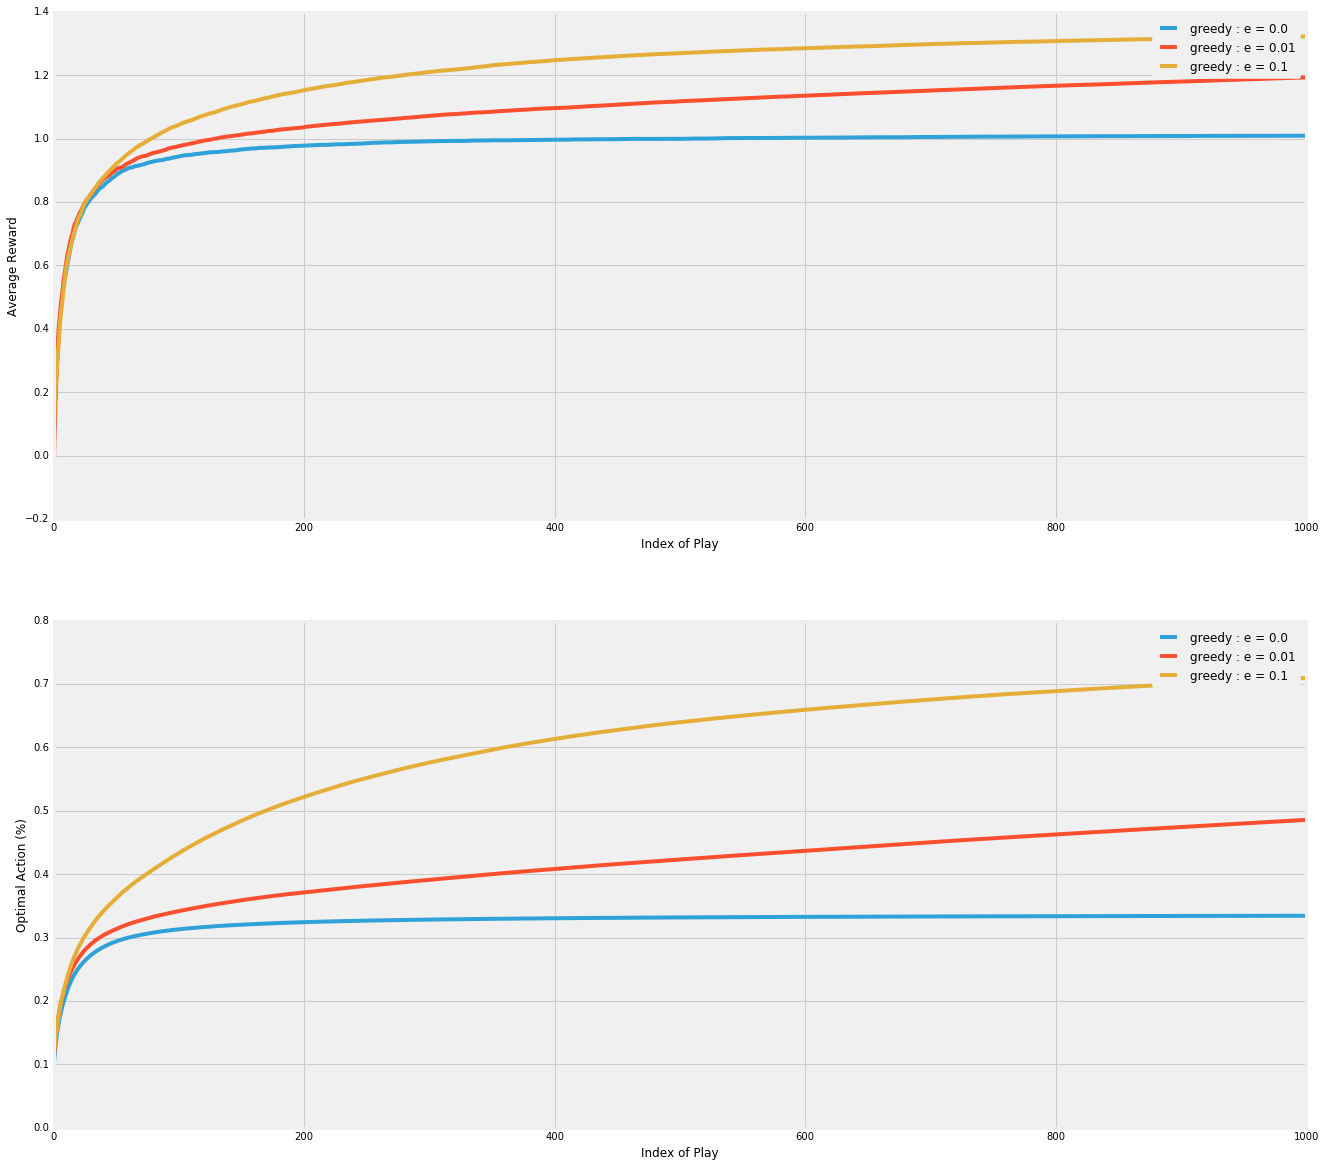

In [8]:
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
for desc, stat in output.items(): 
    
    average_reward_stat = stat[0]
    prob_optimal_action_stat = stat[1]
    average_optimal_reward = stat[2]
    
    ax1.plot(average_reward_stat, label = desc)
    ax1.set_ylabel('Average Reward')
    ax1.set_xlabel('Index of Play')
    
    ax2.plot(prob_optimal_action_stat, label = desc)
    ax2.set_ylabel('Optimal Action (%)')
    ax2.set_xlabel('Index of Play')
    
    print("Optimal reward for {} is {}".format(desc, average_optimal_reward))

ax1.legend() 
ax2.legend()
fig.show()

Exercise 2.1

In the comparison shown above, which method will perform best in the long run in terms of
cumulative reward and probability of selecting the best action ?
How much better will it be ?

Exercise 2.2

How does the softmax action selection method using Gibbs distribution
fare on the 10-armed testbed ? Run it at different temperature. 

In [17]:
# Step 1
agents = {
    "softmax : tau = 0.05": {"class": Softmax, "args": {"tau": 0.05}},
    "softmax : tau = 0.02": {"class": Softmax, "args": {"tau": 0.02}},
    "softmax : tau = 0.01": {"class": Softmax, "args": {"tau": 0.01}}
}

# Step 2
output = {**output, **measure_performance_on_testbed(agents, n_arms = 10, \
                                   n_plays = 1000, n_games = 2000)}

Optimal reward for softmax : tau = 0.05 is 1.5243912799473496
Optimal reward for softmax : tau = 0.001 is 1.5347753903508676
Optimal reward for softmax : tau = 0.02 is 1.548809844219327
Optimal reward for softmax : tau = 0.01 is 1.546780944033228
Optimal reward for softmax : tau = 0.1 is 1.5152083633245637


/Users/shashank/.virtualenvs/openai/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


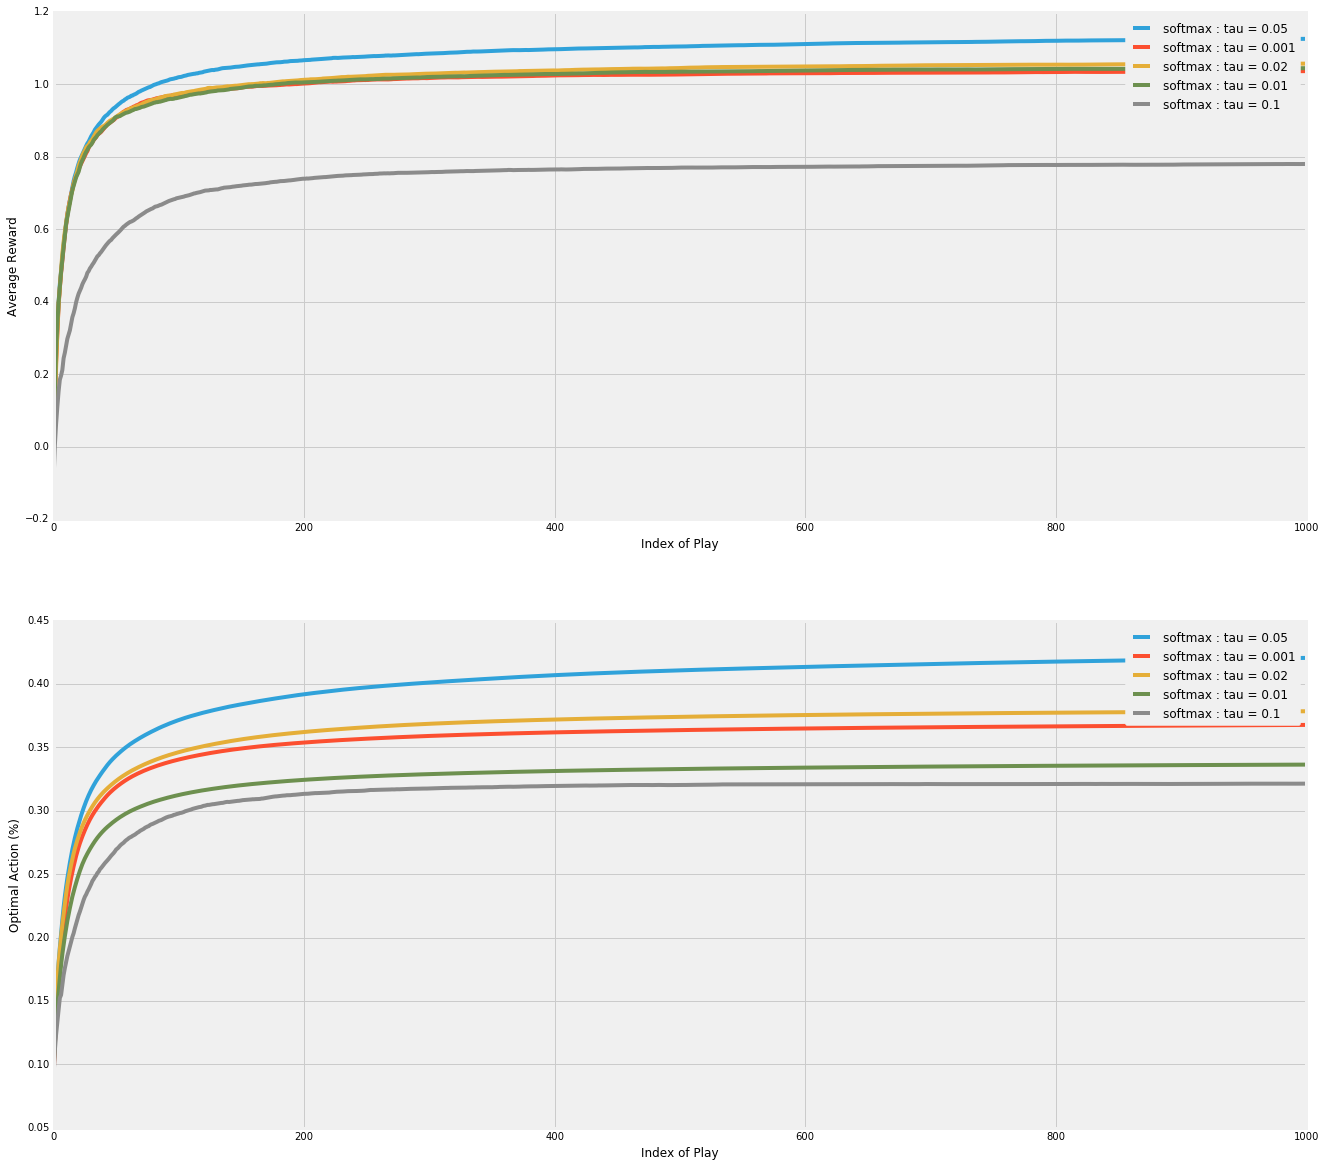

In [18]:
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
for desc, stat in output.items(): 
    
    average_reward_stat = stat[0]
    prob_optimal_action_stat = stat[1]
    average_optimal_reward = stat[2]
    
    ax1.plot(average_reward_stat, label = desc)
    ax1.set_ylabel('Average Reward')
    ax1.set_xlabel('Index of Play')
    
    ax2.plot(prob_optimal_action_stat, label = desc)
    ax2.set_ylabel('Optimal Action (%)')
    ax2.set_xlabel('Index of Play')
    
    print("Optimal reward for {} is {}".format(desc, average_optimal_reward))

ax1.legend() 
ax2.legend()
fig.show()

Exercise 2.3

Show that in the case of two actions, the softmax operation using the Gibbs 
distribution becomes the standard logistic function (or sigmoid) commonly
used in artificial neural networks. What effect does the temperature have 
have on the function ?

$$\frac{e^{Q1/T}}{e^{Q1/T} + e^{Q2/T}} = \frac{1}{1 + e^{Q2-Q1/T}} = \frac{1}{1 + e^{k(Q2-Q1)}}$$

$e^{a(Q2-Q1)}$ is the boltzmann factor for (State1/State2) where $a = 1/T$. Therefore as temperature increases the effect of energy difference will have decreasing effect on preference of one state over another.

<H2> Figure 2.3 </H2>

In [4]:
def measure_performance_on_instructive_binary_testbed(agents, n_plays, n_games):
    """
    :parma agents: A dictionary with a description and (Class, Arguments) for each agent
    :return A dictionary with { label : [ average_reward_stat, optimal_performance_stat]}
    :rtype: dict
    """
    output = {}
    
    for desc, agent in agents.items():
        
        # Initialize the stats
        prob_optimal_action = None
        
        # Create the testbed
        testbed = InstructiveBinaryTestBed(n_plays, n_games, agent_cls = agent["class"], cls_args = agent["args"])
        
        # Run all the games with type A
        games_A = testbed.run_all_games('A')
        
        # Stack performance metrics across the n_games
        prob_optimal_action_A = np.stack([game["prob_optimal_action"] for game in games_A])
        
        # Average performance metrics across n_games
        prob_optimal_action_stat_A = np.mean(prob_optimal_action_A, axis=0)
        
        # Run all the games with type B
        games_B = testbed.run_all_games('B')
        
        # Stack performance metrics across the n_games
        prob_optimal_action_B = np.stack([game["prob_optimal_action"] for game in games_B])
        
        # Average performance metrics across n_games
        prob_optimal_action_stat_B = np.mean(prob_optimal_action_B, axis=0)

        output[desc] = [prob_optimal_action_stat_A, prob_optimal_action_stat_B]
    
    return output

In [ ]:
def single_agent_vs_bandit(bandit_params, agent_params, number_of_games, number_of_plays):
    """
    :param bandit
        example (1) = {"class": InstructiveBinaryBandit, "args": {"_type": 'A'}}
        example (2) = {"class": InstructiveBinaryBandit, "args": {"_type": 'B'}}
    :param agent_params 
        example (1) = {"class": LRI, "args": {"alpha": 0.1}}
        example (2) = {"class": SupervisedBinaryAgent, "args": {}}
    """
    games = []
    for game_id in range(number_of_games):

        bandit_class = bandit_params["class"]
        bandit = bandit_class(**bandit_params["args"])
        
        agent_class = agent_params["class"]
        agent = agent_class(**agent_params["args"])

        optimal_action = np.argmax(bandit.Q_star)
        game = {"optimal_action": [],
                "prob_optimal_action": []}
        for i in range(0, number_of_plays):
            action = agent.select_action()
            reward, obs_params = bandit.act(action)
            agent.send_observation(action, reward, obs_params)
            print(action, reward, obs_params, agent.q_matrix)
            game["optimal_action"].append(action==optimal_action)
            game["prob_optimal_action"].append(sum(game["optimal_action"])/(i+1.0))
        games.append(game)
    
    print("Optimal Selection Rate = {}".format(sum(game["optimal_action"])/len(game["optimal_action"])))
    return game

games = single_agent_vs_bandit(\
    {"class": InstructiveBinaryBandit, "args": {"_type": 'A'}},\
    {"class": SupervisedBinaryAgent, "args": {}},
#     {"class": LRI, "args": {"alpha": 0.1}},\
    10, 10)

In [7]:
# Step 1
agents = {
    "L_R-I": {"class": LRI, "args": {"alpha": 0.1}},
#     "L_R-P": {"class": LRP, "args": {"alpha": 0.1}},
#     "greedy : e = 0.1": {"class": EGreedy, "args": {"e": 0.1, "action_space": 2}},
    "supervised": {"class": SupervisedBinaryAgent, "args": {}}
}

# Step 2
output = {**measure_performance_on_instructive_binary_testbed(agents, \
                                   n_plays = 500, n_games = 2000)}

/Users/shashank/.virtualenvs/openai/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


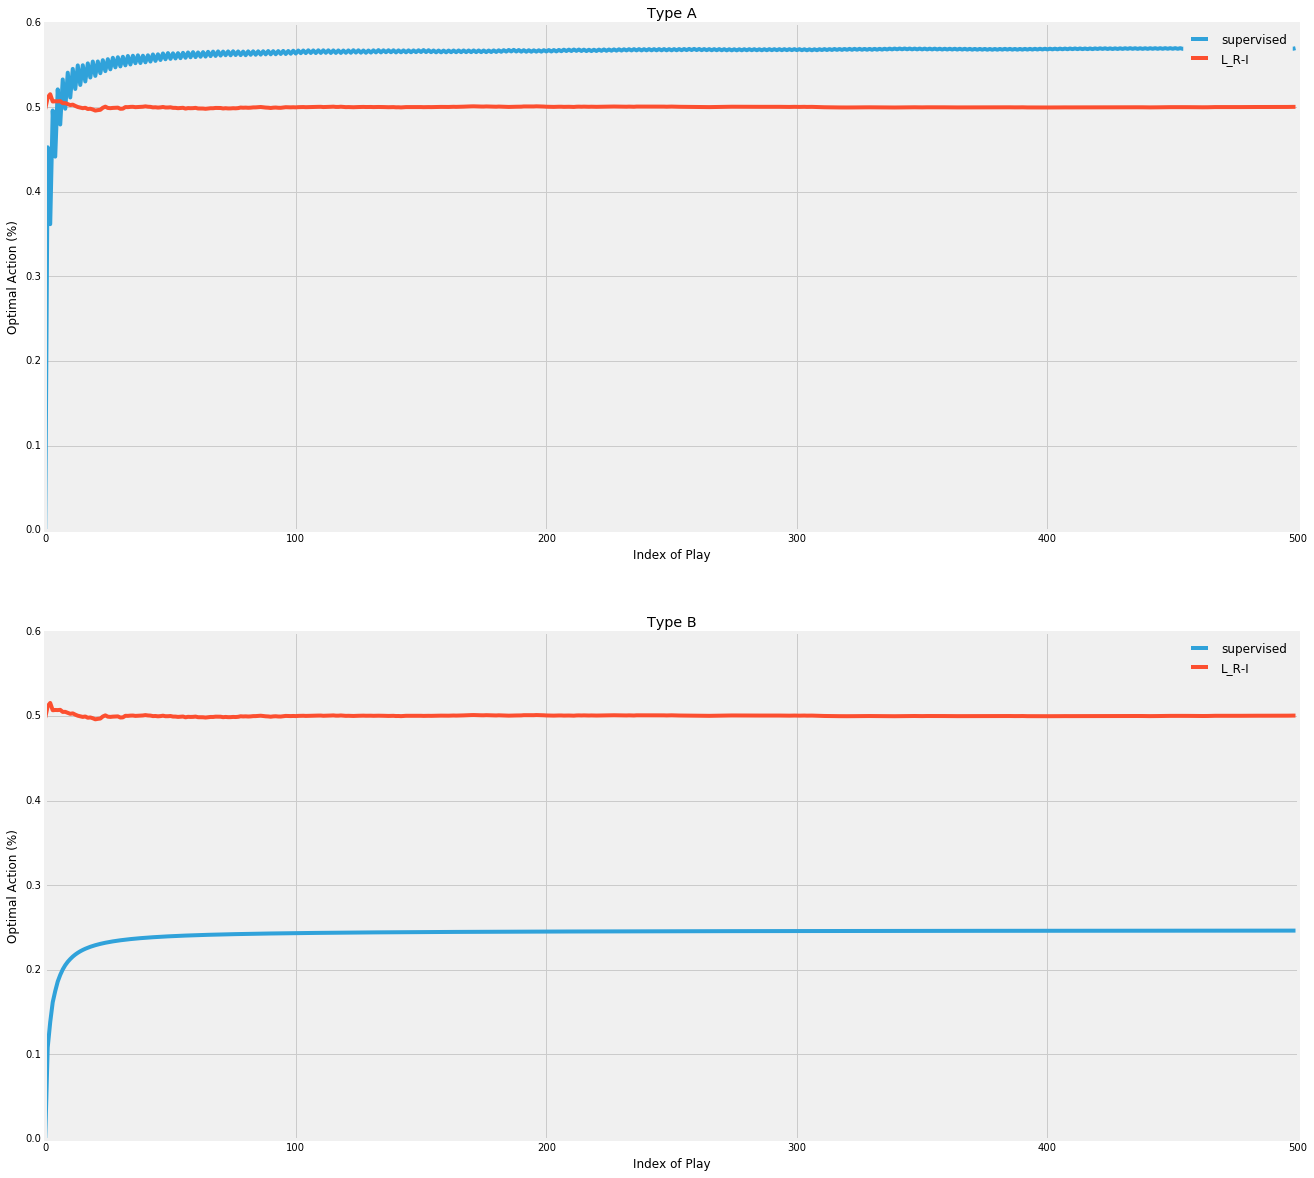

In [8]:
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

for desc, stat in output.items(): 
    
    prob_optimal_action_stat_A = stat[0]
    
    ax1.plot(prob_optimal_action_stat_A, label = desc)
    ax1.set_ylabel('Optimal Action (%)')
    ax1.set_xlabel('Index of Play')
    ax1.set_title('Type A')
    
    prob_optimal_action_stat_B = stat[1]
    
    ax2.plot(prob_optimal_action_stat_B, label = desc)
    ax2.set_ylabel('Optimal Action (%)')
    ax2.set_xlabel('Index of Play')
    ax2.set_title('Type B')
    
ax1.legend() 
ax2.legend()
fig.show()

Exercise 2.6 If the step-size parameters, , are not constant, then the estimate  is a weighted average of previously received rewards with a weighting different from that given by (2.7). What is the weighting on each prior reward for the general case?


$$ Q_k = \prod_{i=1}^{k} (1-a_{i})Q_{0} + \sum_{i=1}^{k} ( a_{k}r_{i} \prod_{j=i, i < k}^{k}(1-a_{j})) $$

Exercise 2.7 (programming)   Design and conduct an experiment to demonstrate the difficulties that 
sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in 
which all the $ Q^{*}(a) $ start out equal and then take independent random walks. Prepare plots like Figure  2.1 for 
an action-value method using sample averages, incrementally computed by $\alpha = \frac{1}{k}$, and another action-value method using a a constant step-size parameter. Use alpha = 0.1 and e = 0.1 and, if necessary, runs longer than 1000 plays.

In [11]:
# Step 1
agents = {
#     "greedy_fixed_step": {"class": EGreedyFixedStep, "args": {"e": 0.1, "action_space": 10, "alpha": 0.1}},
    "greedy : e = 0.1": {"class": EGreedy, "args": {"e": 0.1, "action_space": 10}},
    "ReinforcementComparison : alpha = 0.1": {"class": ReinforcementComparison, "args": {"alpha": 0.1, "action_space": 10, "beta": 0.1}},
    "PursuitMethod : beta = 0.01": {"class": PursuitMethod, "args": {"action_space": 10, "beta": 0.01}}
}

# Step 2
output = {**output, **measure_performance_on_testbed(agents, n_arms = 10, \
                                   n_plays = 1000, n_games = 2000)}

TypeError: __init__() got multiple values for argument 'action_space'

In [ ]:
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
for desc, stat in output.items(): 
    
    average_reward_stat = stat[0]
    prob_optimal_action_stat = stat[1]
    average_optimal_reward = stat[2]
    
    ax1.plot(average_reward_stat, label = desc)
    ax1.set_ylabel('Average Reward')
    ax1.set_xlabel('Index of Play')
    
    ax2.plot(prob_optimal_action_stat, label = desc)
    ax2.set_ylabel('Optimal Action (%)')
    ax2.set_xlabel('Index of Play')
    
    print("Optimal reward for {} is {}".format(desc, average_optimal_reward))

ax1.legend() 
ax2.legend()
fig.show()

Exercise 2.12   An $\varepsilon $-greedy method always selects a random action on a fraction of the time steps. How about the pursuit algorithm? Will it eventually select the optimal action with probability approaching 1?

Answer 


Exercise 2.13   For many of the problems we will encounter later in this book it is not feasible to update action probabilities directly. To use pursuit methods in these cases it is necessary to modify them to use action preferences that are not probabilities but that determine action probabilities according to a softmax relationship such as the Gibbs distribution (2.9). How can the pursuit algorithm described above be modified to be used in this way? Specify a complete algorithm, including the equations for action values, preferences, and probabilities at each play.

Answer 


Exercise 2.14 (programming)   How well does the algorithm you proposed in Exercise 2.13 perform? Design and run an experiment assessing the performance of your method. Discuss the role of parameter settings in your experiment.

Answer 


Exercise 2.15   The pursuit algorithm described above is suited only for stationary environments because the action probabilities converge, albeit slowly, to certainty. How could you combine the pursuit idea with the $\varepsilon $-greedy idea to obtain a method with performance close to that of the pursuit algorithm, but that always continues to explore to some small degree?

Answer 
